# EOmaps Workshop GeoPython 2024
<font size=3>Interactive geo-data analysis with EOmaps and the scientific python infrastructure.</font>

# Data Visualization

EOmaps can be used to visualize both gridded (raster) data or unsorted lists of coordinates and values.  
It provides means to render small datasets as well as millions of datapoints.

> A detailed overview on how to visualize datasets is provided in the [**Data Visualization** section of the EOmaps documentation][docs]

In general, data visualization is split into the following steps:

1. [Assign the data to a `Maps` object with `m.set_data(...)`][assign]
2. [(**optionally**) set the plot-shape with `m.set_shape.< shape >(...)`][shape]
3. [(**optionally**) classify the data with `m.set_classify.< method >(...)`][classify]
4. [Plot the data with `m.plot_map(...)`][plot]

[Maps]: https://eomaps.readthedocs.io/en/latest/generated/eomaps.eomaps.Maps.html
[docs]: https://eomaps.readthedocs.io/en/latest/api_data_visualization.html

[assign]: https://eomaps.readthedocs.io/en/latest/api_data_visualization.html#assign-the-data
[shape]: https://eomaps.readthedocs.io/en/latest/api_data_visualization.html#plot-shapes
[classify]: https://eomaps.readthedocs.io/en/latest/api_data_visualization.html#classify-the-data
[plot]: https://eomaps.readthedocs.io/en/latest/api_data_visualization.html#plot-the-data



## Working with gridded data

In [1]:
from pathlib import Path
import xarray as xar

from eomaps import Maps

In [15]:
%matplotlib qt
Maps.config(always_on_top=True)      # keep figures "always on top"

In [16]:
ncfile = xar.open_dataset(next(Path("gridded_data").iterdir()))

In [17]:
data = ncfile.isel(time=0)
data

<xarray.Dataset> Size: 441MB
Dimensions:    (lat: 1800, lon: 3600)
Coordinates:
  * lat        (lat) float64 14kB 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
  * lon        (lon) float64 29kB -179.9 -179.8 -179.8 ... 179.7 179.8 179.9
    time       datetime64[ns] 8B 2023-06-01T12:00:00
Data variables: (12/18)
    crs        |S1 1B ...
    SWI_005    (lat, lon) float32 26MB ...
    SWI_010    (lat, lon) float32 26MB ...
    SWI_001    (lat, lon) float32 26MB ...
    SWI_015    (lat, lon) float32 26MB ...
    SWI_100    (lat, lon) float32 26MB ...
    ...         ...
    QFLAG_100  (lat, lon) float32 26MB ...
    QFLAG_020  (lat, lon) float32 26MB ...
    QFLAG_005  (lat, lon) float32 26MB ...
    QFLAG_001  (lat, lon) float32 26MB ...
    QFLAG_060  (lat, lon) float32 26MB ...
    SSF        (lat, lon) float32 26MB ...
Attributes: (12/25)
    Conventions:          CF-1.6
    archive_facility:     VITO
    copyright:            Copernicus Service information 2023
    geospatial_lat_max:   89.95
    geospatial_lat_min:   -89.95
    geospatial_lon_max:   179.95
    ...                   ...
    region_name:          GLOBE
    sensor:               ASCAT
    source:               Derived from EO microwave scatterometer observations
    time_coverage_end:    2023-06-01T12:00:00Z
    time_coverage_start:  2023-05-31T12:00:00Z
    title:                Daily Soil Water Index 0.1degree: GLOBE 2023-06-01T...

In [18]:
m = Maps(layer="all", figsize=(6, 3))

In [19]:
m.add_feature.preset("coastline", "ocean")
m.set_shape.shade_raster()

In [20]:
m_ssf = m.new_layer("SSF")
m_ssf.set_data(data, "lon", "lat", parameter="SSF", crs=ncfile.crs.spatial_ref)
m_ssf.plot_map(cmap="RdYlGn_r")

In [21]:
m_swi40 = m.new_layer("SWI 40")
m_swi40.set_data(data, "lon", "lat", parameter="SWI_040", crs=ncfile.crs.spatial_ref)
m_swi40.plot_map()

In [22]:
m_ssf.cb.pick.attach.annotate()
m_ssf.cb.pick.set_execute_on_all_layers(True)

m_swi40.cb.pick.attach.annotate()
m_swi40.cb.pick.set_execute_on_all_layers(True)

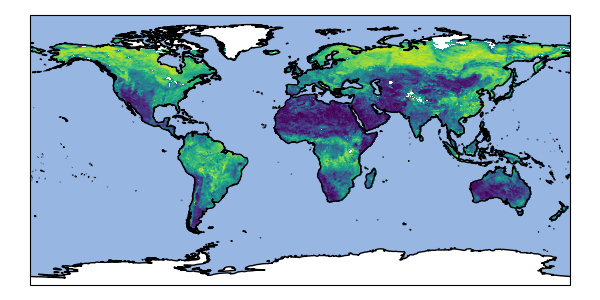

In [23]:
m.snapshot("SWI 40")
m.show()

### IPython Widgets

In [24]:
from eomaps import widgets

In [25]:
widgets.LayerOverlaySlider(m, "SSF")

LayerOverlaySlider(value=0.0, description="Overlay\n'SSF':", max=1.0, step=0.01)

In [26]:
display(widgets.LayerButton(m, "SSF"), widgets.LayerButton(m, "SWI 40"))

LayerButton(description='SSF', style=ButtonStyle())

LayerButton(description='SWI 40', style=ButtonStyle())

## Quick plot functions

In [27]:
m_quick = Maps.from_file.NetCDF(next(Path("gridded_data").iterdir()), parameter="SWI_001", data_crs=4326, isel=dict(time=0), shape="shade_raster", coastline=True)